# 🏪 Proyecto Aurelion

Este notebook documenta el proceso de **análisis, limpieza y transformación de datos** de la tabla `DETALLE_VENTAS` del proyecto *Aurelion*, utilizando la biblioteca **Pandas** en Python.

El objetivo es preparar un conjunto de datos estructurado, limpio y estandarizado para posteriores procesos de análisis estadístico, modelado o visualización.


## 📊 Descripción General

La tabla `DETALLE_VENTAS` contiene información detallada sobre operaciones comerciales, incluyendo campos de identificación, fechas, montos y categorías de productos.

A lo largo de este notebook se realizarán las siguientes tareas principales:

- Importación de los datos desde un archivo **Excel (.xlsx)**.  
- Creación del dataframe inicial `df_detall_venta_c`.  
- Procesamiento, normalización y renombrado de columnas para generar el dataframe limpio `df_detall_venta`.  
- Aplicación de operaciones básicas de **limpieza**, **transformación** y **estandarización** de los datos.  
- Generación de **estadísticas descriptivas** para comprender la distribución y consistencia de las variables.


## ⚙️ Limpieza y Transformación de los Datos

En esta sección se detallan las operaciones realizadas para asegurar la integridad y coherencia del dataset:

1. **Revisión de valores nulos y duplicados.**  
   - Identificación y tratamiento de valores faltantes.  
   - Eliminación o imputación según el contexto de negocio.

2. **Estandarización de tipos de datos.**  
   - Conversión de fechas, montos y categorías al formato correcto.  
   - Normalización de cadenas y eliminación de espacios o caracteres no deseados.

3. **Renombrado de columnas.**  
   - Aplicación de nombres consistentes y descriptivos conforme a las buenas prácticas de análisis de datos.

4. **Validación del dataframe final.**  
   - Verificación de dimensiones, tipos y contenido.  
   - Comparación con el dataframe original (`df_detall_venta_c`).


## 📈 Resultados y Estadísticas Descriptivas

Finalmente, se presentan los principales resultados del proceso de preparación de datos:

- Distribución de valores por variable clave.  
- Identificación de outliers y patrones relevantes.  
- Métricas de tendencia central y dispersión.  
- Estado final del dataframe `df_detall_venta` listo para análisis posteriores.


## 🛠 Instalación e Importación de Librerías.

En esta sección se instalan y cargan las principales bibliotecas de Python utilizadas para el análisis de datos.

- Estas herramientas permiten realizar tareas de manipulación, limpieza, transformación y visualización de la información contenida en el dataset `DETALLE_VENTAS`.


### 🔧 Instalación de librerías

Si el entorno de ejecución no cuenta con las dependencias necesarias, pueden instalarse con los siguientes comandos:

- %pip install pandas numpy scikit-learn category_encoders matplotlib seaborn
- %pip install openpyxl


In [22]:
# Instala dependencias principales para procesamiento y visualizaci?n
%pip install pandas numpy scikit-learn category_encoders matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Asegura el motor openpyxl para leer archivos Excel
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importamos librerias instaladas para implementarlas en el código

In [24]:
# Importa librer?as de ETL, codificaci?n categ?rica y visualizaci?n
import pandas as pd
import numpy as np
import sklearn as sk
import category_encoders as ce
import matplotlib.pyplot as plt
from pathlib import Path


## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** utilizando una **ruta relativa** y la librería `pathlib.Path`. Esto no solo simplifica la ruta, sino que también garantiza que el código sea **portable** y funcione correctamente en diferentes sistemas operativos (Windows, macOS, Linux), siempre y cuando la estructura de directorios se mantenga consistente.

> 📂 **Ruta del archivo:**  
> El archivo se accede mediante la construcción **`Path('db') / 'detalle_ventas.xlsx'`**.

La lectura del archivo se efectúa mediante la función `pd.read_excel()` de la biblioteca **pandas**, creando el dataframe inicial `df_detall_venta_c`, el cual servirá como base para los procesos posteriores de limpieza y análisis.


In [25]:
# Carga el detalle de ventas con Path para mantener rutas relativas portables
path_dataset = Path('db') / 'detalle_ventas.xlsx'
df_detall_venta_c = pd.read_excel(path_dataset)

# Obtiene una vista preliminar para auditar columnas y tipos
df_detall_venta_c.head()


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069


## 🔍 Inspección Inicial del Dataset

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_detall_venta_c` recién cargado, con el objetivo de verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Para ello, se utilizan las funciones:

In [26]:
# Ampl?a la inspecci?n a 8 filas para descubrir valores at?picos iniciales
df_detall_venta_c.head(8)


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069
5,2,79,Hamburguesas Congeladas x4,4,2420,9680
6,3,9,Yerba Mate Suave 1kg,2,3878,7756
7,3,2,Pepsi 1.5L,2,4973,9946


In [27]:
# Revisa el cierre del dataset con las ?ltimas 4 filas
df_detall_venta_c.tail(4)


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
339,118,93,Cepillo de Dientes,3,2142,6426
340,118,50,Azúcar 1kg,2,727,1454
341,119,45,Fideos Spaghetti 500g,5,745,3725
342,120,20,Pan Lactal Blanco,5,1571,7855


## 🧠 Exploración de Tipos de Datos y Valores Nulos

En esta etapa se realiza una **revisión estructural del DataFrame** para confirmar que los tipos de datos asignados a cada variable durante la lectura con `pd.read_excel()` sean correctos y coherentes con la naturaleza de la información (por ejemplo, fechas, números, textos, etc.).

Además, se evalúa la **presencia de valores nulos o faltantes**, los cuales podrían requerir tratamiento posterior durante el proceso de limpieza y estandarización.

### 🧩 Procedimiento

In [28]:
# Sintetiza estructura de columnas, tipos dtypes y nulos del dataframe crudo
df_detall_venta_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         343 non-null    int64 
 1   id_producto      343 non-null    int64 
 2   nombre_producto  343 non-null    object
 3   cantidad         343 non-null    int64 
 4   precio_unitario  343 non-null    int64 
 5   importe          343 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 16.2+ KB



> 💡 **Conclusión:**  
> A partir de la ejecución del comando `df_detall_venta_c.info()`, se observa que la base de datos cuenta con **343 registros** distribuidos en **6 columnas**.  
> Cada columna presenta **343 valores no nulos**, lo que indica que **no existen datos faltantes (NaN)** en el dataset.


### 🕵️‍♂️ Detección de Valores Nulos

Se analiza la presencia de valores faltantes para priorizar acciones de limpieza y asegurar la consistencia del dataset.

In [29]:
# Genera una m?scara booleana que marca con True cada celda nula
df_detall_venta_c.isnull()


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
338,False,False,False,False,False,False
339,False,False,False,False,False,False
340,False,False,False,False,False,False
341,False,False,False,False,False,False


In [30]:
# Resume la cantidad total de nulos por columna para orientar la limpieza
df_detall_venta_c.isnull().sum()


id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            0
dtype: int64

## ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar la normalización de la base de datos, es necesario **verificar y corregir los tipos de datos** asignados a las variables numéricas.  
En este caso, las columnas `precio_unitario` e `importe` fueron cargadas con tipo `int64`, pero deben representarse como valores decimales (`float64`) para reflejar correctamente los montos monetarios.

### 🧩 Fundamento

Corregir los tipos de datos garantiza la **precisión numérica** en cálculos y estadísticas.  
Si se mantuvieran como enteros, se perdería información decimal y se podrían producir errores al calcular promedios, totales o al aplicar operaciones aritméticas.

Este paso forma parte del proceso de **limpieza estructural** dentro de la metodología ETL (Extract, Transform, Load):

1. **Extracción:** se importan los datos desde el archivo Excel.  
2. **Transformación estructural:** se ajustan los tipos de datos para asegurar coherencia.  
3. **Normalización:** se reorganiza la base, eliminando redundancias o columnas innecesarias.

### 🧮 Procedimiento

- Se aplican las transformaciones para:

     **Monetarias(decimales):** Convertir `precio_unitario` e `importe`, el tipo `float` (decimal) para asegurar la precisión numérica y habilitar análisis estadisticos o escalado.

In [31]:
# Converte campos monetarios a float para habilitar estad?sticas y escalado
df_detall_venta_c["precio_unitario"] = df_detall_venta_c["precio_unitario"].astype(float)
df_detall_venta_c["importe"] = df_detall_venta_c["importe"].astype(float)


#### 🕵️‍♂️ Verificación de Transformaciones

Se valida que los cambios aplicados hayan surtido efecto tanto en los tipos de datos como en los valores muestreados.

In [32]:
# Verifica que ambas columnas hayan quedado tipadas como float64
df_detall_venta_c[["precio_unitario", "importe"]].dtypes


precio_unitario    float64
importe            float64
dtype: object

In [33]:
# Muestra valores actualizados para confirmar la conversi?n num?rica
df_detall_venta_c[["precio_unitario", "importe"]].head()


,precio_unitario,importe
0,2902.0,2902.0
1,2394.0,11970.0
2,469.0,2345.0
3,4061.0,8122.0
4,2069.0,2069.0


#### 🧩 Normalización de la Base de Datos

En esta etapa se aplica la **forma de normalización** sobre el DataFrame `df_detall_venta_c`, eliminando la columna `nombre_producto`.  
Esta variable presenta información redundante respecto a `id_producto`, por lo que se suprime para evitar duplicidad de datos y mantener la integridad estructural de la base.

In [34]:
# Genera df_detall_venta_True sin la dimensi?n redundante 'nombre_producto'
df_detall_venta_True = df_detall_venta_c.drop(columns=['nombre_producto'])


## 📊 Análisis Estadístico Descriptivo

En este paso se aplica el método `describe()` sobre la base normalizada `df_detall_venta_True`, con el fin de obtener un **resumen estadístico básico** de las variables numéricas.

### ⚙️ Procedimiento

In [35]:
# Obtiene estad?sticos descriptivos b?sicos para variables num?ricas
df_detall_venta_True.describe()


,id_venta,id_producto,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000,343.000000,343.000000
mean,61.492711,49.139942,2.962099,2654.495627,7730.078717
std,34.835525,29.135461,1.366375,1308.694720,5265.543077
min,1.000000,1.000000,1.000000,272.000000,272.000000
25%,31.000000,23.000000,2.000000,1618.500000,3489.000000
50%,61.000000,47.000000,3.000000,2512.000000,6702.000000
75%,93.000000,76.000000,4.000000,3876.000000,10231.500000
max,120.000000,100.000000,5.000000,4982.000000,24865.000000


In [36]:
# Eval?a estad?sticos extendidos (incluye categ?ricas) aunque no agregue informaci?n nueva
df_detall_venta_True.describe(include='all')


,id_venta,id_producto,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000,343.000000,343.000000
mean,61.492711,49.139942,2.962099,2654.495627,7730.078717
std,34.835525,29.135461,1.366375,1308.694720,5265.543077
min,1.000000,1.000000,1.000000,272.000000,272.000000
25%,31.000000,23.000000,2.000000,1618.500000,3489.000000
50%,61.000000,47.000000,3.000000,2512.000000,6702.000000
75%,93.000000,76.000000,4.000000,3876.000000,10231.500000
max,120.000000,100.000000,5.000000,4982.000000,24865.000000


> 💡 **Conclusión:**  
> El DataFrame `df_detall_venta_True` no requiere corrección de valores faltantes.  
> Se puede avanzar directamente hacia la siguiente fase del análisis exploratorio: **detección de outliers y visualización de distribuciones.**

### Transformación de Variables - Normalización

In [37]:
# Importa escaladores cl?sicos para comparar estrategias de normalizaci?n
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [38]:
# Aplica StandardScaler a 'importe' para obtener valores centrados y con varianza unitaria
scaler_standard = StandardScaler()  # Instancia el escalador z-score
importe_std = scaler_standard.fit_transform(df_detall_venta_True[['importe']])  # Ajusta y transforma en una sola operaci?n


In [39]:
# Verifica las primeras filas antes de anexar la columna escalada al dataframe
df_detall_venta_True.head(3)  # La columna 'importe_std' a?n no forma parte del DataFrame


,id_venta,id_producto,cantidad,precio_unitario,importe
0,1,90,1,2902.0,2902.0
1,2,82,5,2394.0,11970.0
2,2,39,5,469.0,2345.0


In [40]:
# Incorpora la columna normalizada 'importe_std' al dataset preparado
df_detall_venta_True['importe_std'] = importe_std


In [41]:
# Confirma la incorporaci?n de 'importe_std' y revisa su escala centrada
df_detall_venta_True.head(3)  # Valores centrados en 0 y con desviaci?n 1 tras StandardScaler


,id_venta,id_producto,cantidad,precio_unitario,importe,importe_std
0,1,90,1,2902.0,2902.0,-0.918259
1,2,82,5,2394.0,11970.0,0.806396
2,2,39,5,469.0,2345.0,-1.024196


### **Anlálisis exploratorio preliminar**

#### 📊 Análisis de Distribución (Variable: **importe**)

- Se utiliza un **Histograma** o un **Boxplot** para visualizar la forma de la distribución de los importes originales. El objetivo es identificar la presencia de sesgo (ej. cola larga a la derecha) y la magnitud de los *outliers* antes de la estandarización.

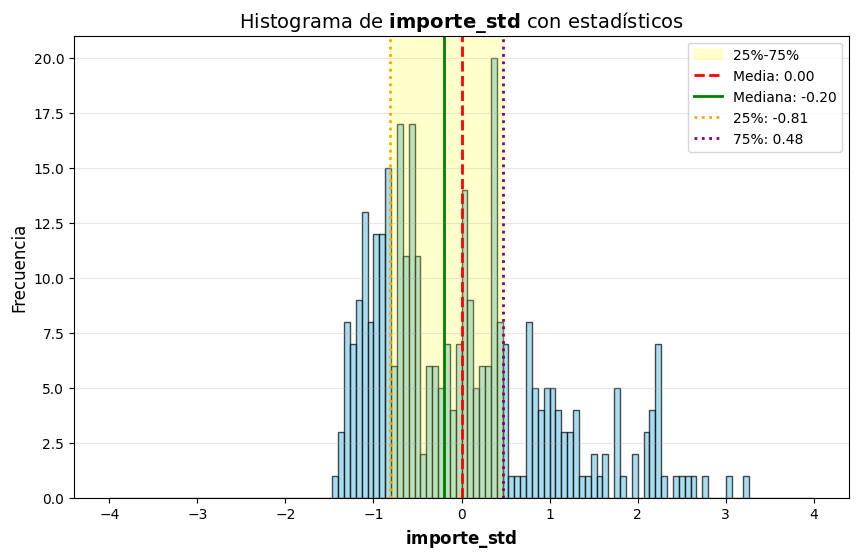

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Serie estandarizada a graficar
data_std = df_detall_venta_True['importe_std']

# Calcula estad?sticos relevantes para resaltar en el gr?fico
media = data_std.mean()
mediana = data_std.median()
p25 = np.percentile(data_std, 25)
p75 = np.percentile(data_std, 75)

# Construye histograma con mayor resoluci?n en el rango central
plt.figure(figsize=(10,6))
plt.hist(data_std, bins=120, range=(-4,4), color='skyblue', edgecolor='black', alpha=0.7)  # Frecuencia real

# Destaca la banda intercuart?lica sobre el histograma
plt.axvspan(p25, p75, color='yellow', alpha=0.2, label='25%-75%')

# A?ade marcadores estad?sticos clave
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(p25, color='orange', linestyle=':', linewidth=2, label=f'25%: {p25:.2f}')
plt.axvline(p75, color='purple', linestyle=':', linewidth=2, label=f'75%: {p75:.2f}')

# Configura t?tulos, etiquetas y cuadr?cula
plt.title(r'Histograma de $\mathbf{importe\_std}$ con estad?sticos', fontsize=14)
plt.xlabel(r'$\mathbf{importe\_std}$', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


### 🧩 **Conclusión del Histograma de `importe`**

La distribución de `importe` muestra una **asimetría positiva** (sesgo a la derecha), con la mayoría de las ventas concentradas en valores medios y una cola extendida hacia los importes más altos.  
La **media superior a la mediana** confirma este sesgo, indicando que existen algunas ventas de alto valor que elevan el promedio.  

El **rango intercuartílico (IQR)** abarca la mayor parte de los casos típicos de venta, mientras que los valores por encima de Q3 + 1.5×IQR representan **ventas atípicas pero válidas**, usuales en contextos comerciales reales.  
Se observa una **curtosis moderada**, lo que implica una concentración razonable de datos alrededor de la media sin una dispersión extrema.

> **En síntesis:** la variable `importe` presenta un comportamiento estadístico esperado para datos económicos, donde predominan las transacciones de bajo y mediano monto, acompañadas de pocas operaciones de alto valor que aportan variabilidad natural al conjunto.


#### 📈 Análisis de Estandarización Z-score (Variable: **importe_z**)

- Se utiliza un **Gráfico Comparativo** (generalmente un Histograma o un gráfico de densidad) para mostrar la distribución de la variable después de la estandarización Z-score. El objetivo es confirmar que la distribución se centra en la media **cero** y que los *outliers* quedan claramente definidos por su distancia en unidades de desviación estándar (ej. valores > 2σ).

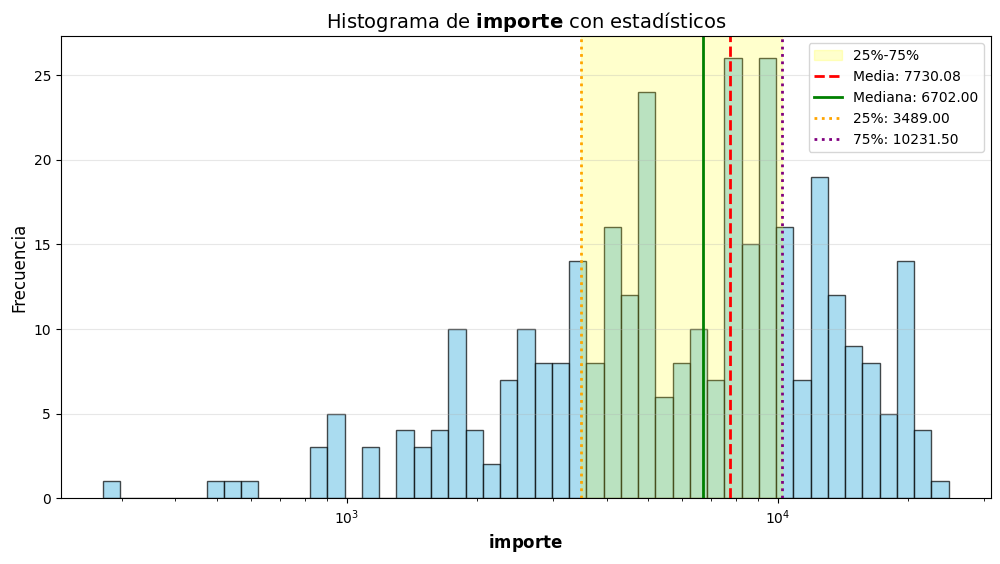

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Serie original sin escalar
data_imp = df_detall_venta_True['importe']

# Obtiene estad?sticos descriptivos que se resaltar?n en el histograma
media = data_imp.mean()
mediana = data_imp.median()
p25 = np.percentile(data_imp, 25)
p75 = np.percentile(data_imp, 75)

# Define bins logar?tmicos para capturar amplitudes amplias de importe
bins_log = np.logspace(np.log10(data_imp.min()), np.log10(data_imp.max()), 50)  # 50 bins log

# Dibuja histograma con escala logar?tmica en el eje X
plt.figure(figsize=(12,6))
plt.hist(data_imp, bins=bins_log, color='skyblue', edgecolor='black', alpha=0.7)
plt.xscale('log')

# Resalta la dispersi?n central entre Q1 y Q3
plt.axvspan(p25, p75, color='yellow', alpha=0.2, label='25%-75%')

# A?ade l?neas gu?a para media, mediana y cuartiles
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(p25, color='orange', linestyle=':', linewidth=2, label=f'25%: {p25:.2f}')
plt.axvline(p75, color='purple', linestyle=':', linewidth=2, label=f'75%: {p75:.2f}')

# Etiquetas, t?tulo y cuadr?cula de soporte
plt.title(r'Histograma de $\mathbf{importe}$ con estad?sticos', fontsize=14)
plt.xlabel(r'$\mathbf{importe}$', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


### 🧩 **Conclusión del Histograma de `importe_std` (Estandarizado)**

Tras aplicar la estandarización mediante `StandardScaler`, la variable `importe_std` mantiene la forma asimétrica original, pero ahora está **centrada en torno a 0** y expresada en **unidades de desviación estándar (σ)**.  
Aproximadamente el **68% de las observaciones** se encuentran dentro del rango **-1σ a +1σ**, correspondientes a ventas dentro del comportamiento típico.  

Las observaciones que superan las **+2σ** son casos excepcionales —ventas notablemente superiores a la media— y pueden considerarse **outliers moderados** sin ser errores de registro.  
Esta transformación **no altera la forma de la distribución**, pero facilita la comparación entre variables y la detección de desviaciones significativas.

> **En síntesis:** la estandarización permite analizar los importes desde una perspectiva estadística homogénea, destacando qué tan alejadas están las ventas de la media general y preparando la base para estudios de correlación o modelos predictivos.



#### 💬 Conclusión global:
El análisis conjunto de ambas distribuciones confirma que la base de ventas presenta una **variabilidad natural**, sin sesgos anómalos ni errores de registro.  
La estandarización mejora la interpretación estadística y sienta las bases para etapas posteriores de análisis multivariante o detección de patrones.